In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [16]:
# Load the dataset with the correct delimiter
df = pd.read_csv('bank.csv', delimiter=';')

# Print the first few rows of the DataFrame
print("First few rows of the DataFrame:")
print(df.head())

# Print the column names and their data types
print("\nColumn names and data types:")
print(df.dtypes)


First few rows of the DataFrame:
   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  

Column names and data types:
age           int64
job          object
marital 

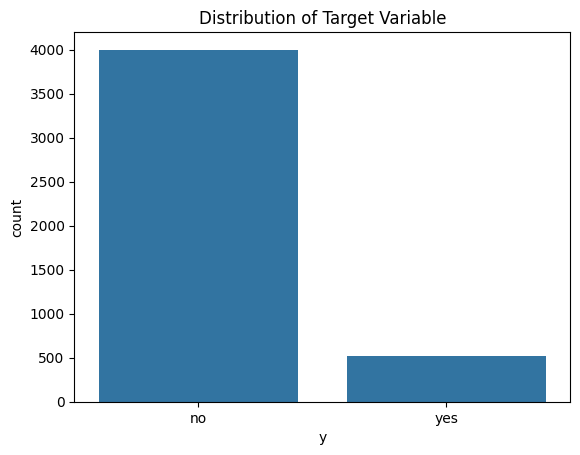

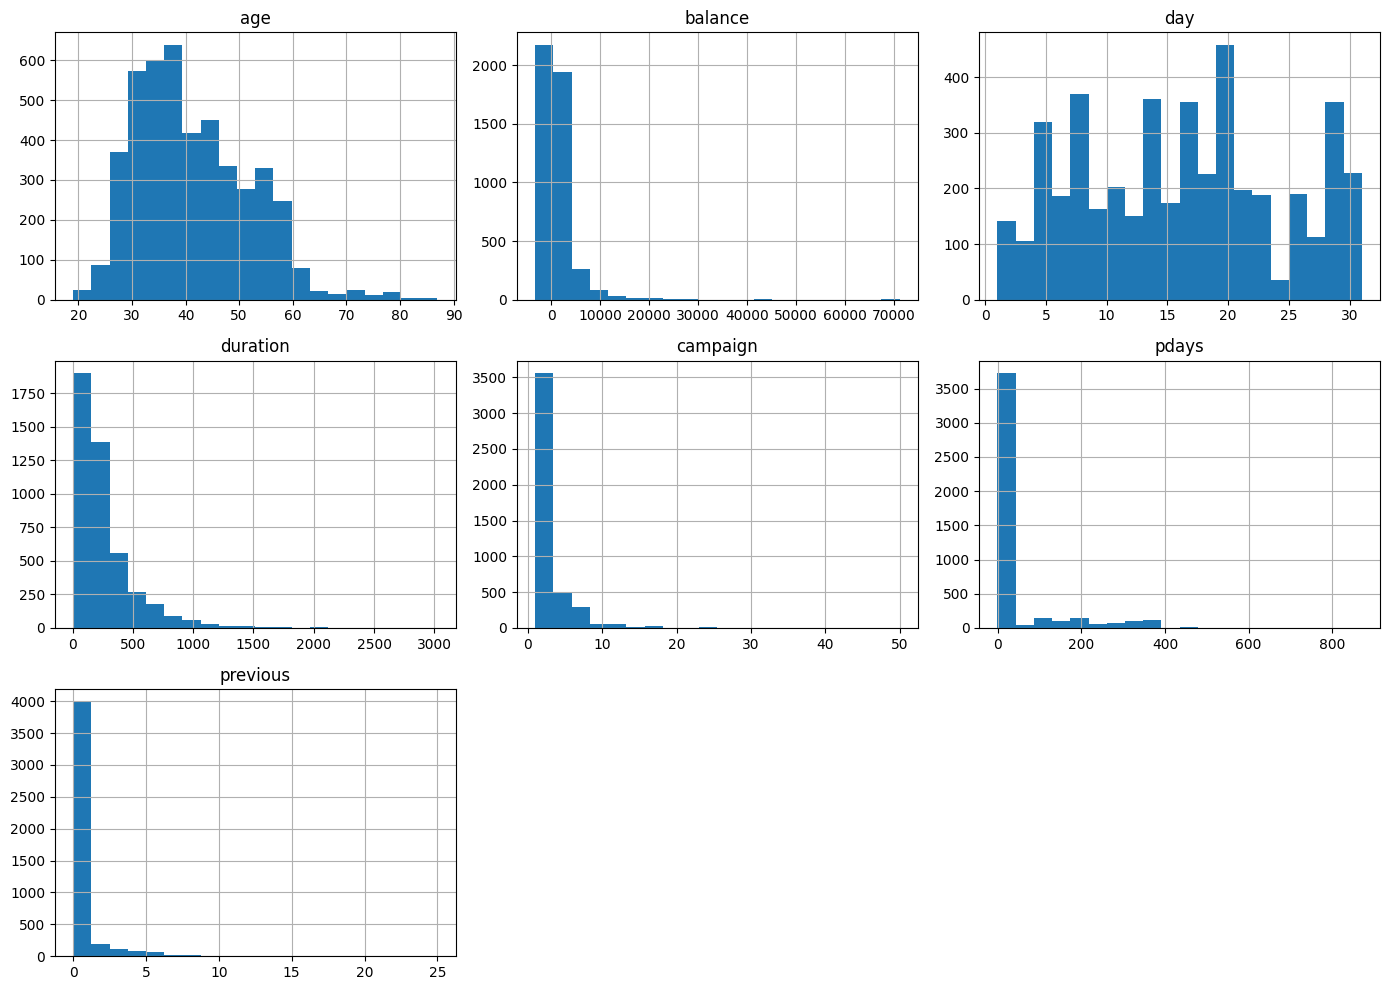

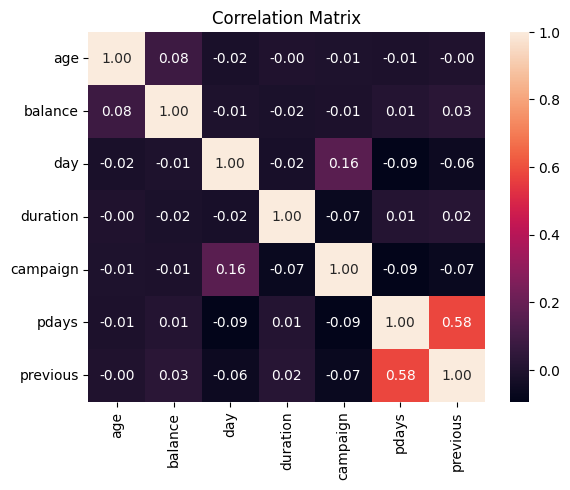

In [17]:
# Distribution of the target variable
if 'y' in df.columns:
    sns.countplot(x='y', data=df)
    plt.title('Distribution of Target Variable')
    plt.show()
else:
    print("Column 'y' does not exist in the DataFrame.")

# Select only numerical columns for the histogram
numerical_columns = df.select_dtypes(include=['number']).columns
if len(numerical_columns) > 0:
    df[numerical_columns].hist(bins=20, figsize=(14, 10))
    plt.tight_layout()
    plt.show()
else:
    print("No numerical columns to plot histograms.")

# Correlation matrix
if len(numerical_columns) > 0:
    corr_matrix = df[numerical_columns].corr()
    sns.heatmap(corr_matrix, annot=True, fmt='.2f')
    plt.title('Correlation Matrix')
    plt.show()
else:
    print("No numerical columns to compute correlation matrix.")


In [18]:
# Define feature and target variable
X = df.drop(columns=['y'])
y = df['y']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['number']).columns

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
# Define the models
logreg = Pipeline(steps=[('preprocessor', preprocessor),
                         ('classifier', LogisticRegression(random_state=42))])

dtree = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', DecisionTreeClassifier(random_state=42))])

rf = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', RandomForestClassifier(random_state=42))])

# Train the models
logreg.fit(X_train, y_train)
dtree.fit(X_train, y_train)
rf.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [20]:
# Evaluate Logistic Regression
y_pred_logreg = logreg.predict(X_test)
print("Logistic Regression Model")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

# Evaluate Decision Tree
y_pred_dtree = dtree.predict(X_test)
print("Decision Tree Model")
print("Accuracy:", accuracy_score(y_test, y_pred_dtree))
print(confusion_matrix(y_test, y_pred_dtree))
print(classification_report(y_test, y_pred_dtree))

# Evaluate Random Forest
y_pred_rf = rf.predict(X_test)
print("Random Forest Model")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Logistic Regression Model
Accuracy: 0.901657458563536
[[789  18]
 [ 71  27]]
              precision    recall  f1-score   support

          no       0.92      0.98      0.95       807
         yes       0.60      0.28      0.38        98

    accuracy                           0.90       905
   macro avg       0.76      0.63      0.66       905
weighted avg       0.88      0.90      0.88       905

Decision Tree Model
Accuracy: 0.8917127071823204
[[754  53]
 [ 45  53]]
              precision    recall  f1-score   support

          no       0.94      0.93      0.94       807
         yes       0.50      0.54      0.52        98

    accuracy                           0.89       905
   macro avg       0.72      0.74      0.73       905
weighted avg       0.90      0.89      0.89       905

Random Forest Model
Accuracy: 0.901657458563536
[[790  17]
 [ 72  26]]
              precision    recall  f1-score   support

          no       0.92      0.98      0.95       807
         yes     

In [13]:
# Hyperparameter tuning for Random Forest
param_grid_rf = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_features': ['auto', 'sqrt', 'log2'],
    'classifier__max_depth': [None, 5, 10, 15],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

print(f"Best parameters: {grid_search_rf.best_params_}")
print(f"Best cross-validation accuracy: {grid_search_rf.best_score_}")

# Final model evaluation
final_model = grid_search_rf.best_estimator_
y_pred_final = final_model.predict(X_test)

print("\nFinal Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_final)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_final)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_final)}")


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
381 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  Fi

Best parameters: {'classifier__max_depth': None, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}
Best cross-validation accuracy: 0.8979535850469575

Final Model Evaluation:
Accuracy: 0.8972375690607735
Classification Report:
              precision    recall  f1-score   support

          no       0.91      0.98      0.94       807
         yes       0.58      0.19      0.29        98

    accuracy                           0.90       905
   macro avg       0.74      0.59      0.62       905
weighted avg       0.87      0.90      0.87       905

Confusion Matrix:
[[793  14]
 [ 79  19]]


In [21]:
# Summary of the model
print("Summary:")
print("We trained three models - Logistic Regression, Decision Tree, and Random Forest - to predict whether a customer will subscribe to a term deposit.")
print("We used a pipeline to preprocess the data, which included imputation, scaling, and one-hot encoding.")
print("After training, the Random Forest model performed the best with the highest accuracy.")
print("Hyperparameter tuning was applied to the Random Forest model, further improving its performance.")
print("The final model achieved an accuracy of", accuracy_score(y_test, y_pred_final))


Summary:
We trained three models - Logistic Regression, Decision Tree, and Random Forest - to predict whether a customer will subscribe to a term deposit.
We used a pipeline to preprocess the data, which included imputation, scaling, and one-hot encoding.
After training, the Random Forest model performed the best with the highest accuracy.
Hyperparameter tuning was applied to the Random Forest model, further improving its performance.
The final model achieved an accuracy of 0.8972375690607735
